In [5]:

import numpy as np
import matplotlib.pyplot as plt


def pause_plot():
    fig, ax = plt.subplots(1, 1)
    x = np.arange(-np.pi, np.pi, 0.1)
    y = np.sin(x)
    # 初期化的に一度plotしなければならない
    # そのときplotしたオブジェクトを受け取る受け取る必要がある．
    # listが返ってくるので，注意
    lines, = ax.plot(x, y)

    # ここから無限にplotする
    while x.max() < 10:
        # plotデータの更新
        x += 0.1
        y = np.sin(x)

        # 描画データを更新するときにplot関数を使うと
        # lineオブジェクトが都度増えてしまうので，注意．
        #
        # 一番楽なのは上記で受け取ったlinesに対して
        # set_data()メソッドで描画データを更新する方法．
        lines.set_data(x, y)

        # set_data()を使うと軸とかは自動設定されないっぽいので，
        # 今回の例だとあっという間にsinカーブが描画範囲からいなくなる．
        # そのためx軸の範囲は適宜修正してやる必要がある．
        ax.set_xlim((x.min(), x.max()))

        # 一番のポイント
        # - plt.show() ブロッキングされてリアルタイムに描写できない
        # - plt.ion() + plt.draw() グラフウインドウが固まってプログラムが止まるから使えない
        # ----> plt.pause(interval) これを使う!!! 引数はsleep時間
        #plt.pause(.01)
        plt.pause(.1)

if __name__ == "__main__":
    pause_plot()

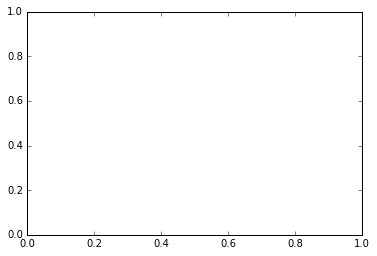

In [3]:
fig, ax = plt.subplots()


http://stackoverflow.com/questions/21360361/how-to-dynamically-update-a-plot-in-a-loop-in-ipython-notebook-within-one-cell

<IPython.core.display.Javascript object>


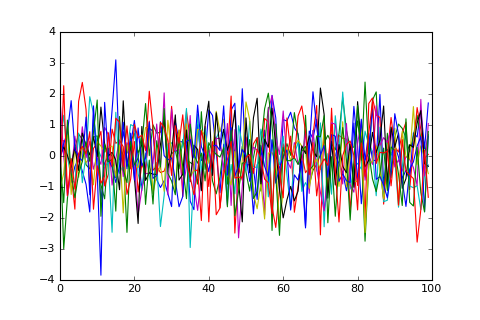

In [10]:
%matplotlib nbagg
import time
import pylab as pl
from IPython import display
for i in range(10):
    pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1)

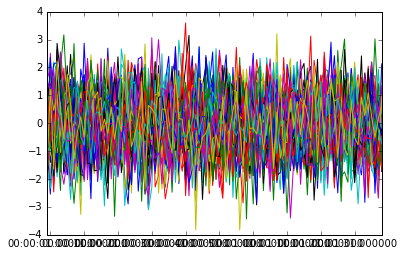

In [12]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline

i = pd.date_range('2013-1-1',periods=100,freq='s')

while True:
    try:
        plt.plot(pd.Series(data=np.random.randn(100), index=i))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.1)
    except KeyboardInterrupt:
        break

https://github.com/anujgupta82/Musings/blob/master/Dynamic%20or%20Live%20update%20of%20a%20Plot.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


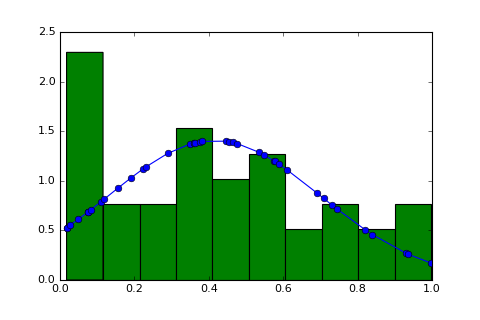

<IPython.core.display.Javascript object>


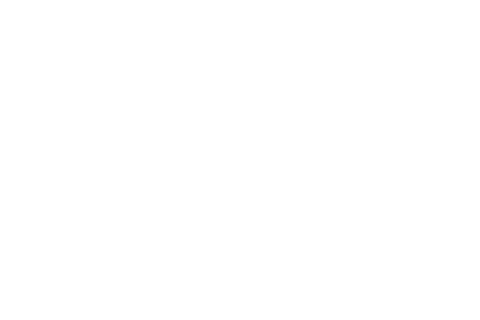

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

# we create a matrix of 10 x 4 - 
import random
N = 40
M = 100
a = [[random.random() for i in range(N)] for j in range(M)]

#print a


# now plot a dynamic graph

#first the imports 

import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import time

#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

#iterate - plot, erase
for i in range(0,M):
    #print i
    ax.clear() # - Clear
    h = sorted(a[i])
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    ax.plot(h,fit,'-o') # fit the line
    ax.hist(h,normed=True) # fit the histogram
    fig.canvas.draw()   # draw
    time.sleep(0.01)    #sleep